Enter Image URL :-  https://c4.wallpaperflare.com/wallpaper/353/770/515/tv-series-peaky-blinders-cillian-murphy-oldtimer-wallpaper-preview.jpg


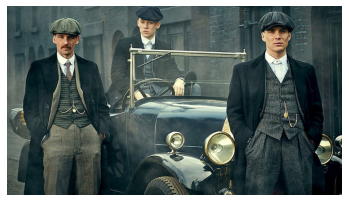

{'categories': [{'name': 'others_', 'score': 0.15625}, {'name': 'outdoor_', 'score': 0.00390625, 'detail': {'landmarks': []}}], 'description': {'tags': ['person', 'outdoor', 'man', 'standing', 'military', 'old', 'suit', 'car'], 'captions': [{'text': 'a group of men in military uniforms', 'confidence': 0.42593228816986084}]}, 'faces': [{'age': 30, 'gender': 'Male', 'faceRectangle': {'left': 558, 'top': 37, 'width': 60, 'height': 60}}, {'age': 54, 'gender': 'Male', 'faceRectangle': {'left': 102, 'top': 53, 'width': 50, 'height': 50}}, {'age': 21, 'gender': 'Male', 'faceRectangle': {'left': 282, 'top': 25, 'width': 39, 'height': 39}}], 'objects': [{'rectangle': {'x': 218, 'y': 2, 'w': 155, 'h': 219}, 'object': 'person', 'confidence': 0.779}, {'rectangle': {'x': 29, 'y': 27, 'w': 196, 'h': 377}, 'object': 'person', 'confidence': 0.934}, {'rectangle': {'x': 470, 'y': 8, 'w': 229, 'h': 393}, 'object': 'person', 'confidence': 0.866}, {'rectangle': {'x': 197, 'y': 81, 'w': 306, 'h': 326}, 'obj

In [4]:
import requests
%matplotlib inline
import matplotlib.pyplot as plt
import json
from PIL import Image
from io import BytesIO

subscription_key = "128ba37bdaa043118ade8a452875c59e"
analyze_url = "https://imagedetection16.cognitiveservices.azure.com//vision/v3.1/analyze"
image_url = input("Enter Image URL :- ")
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {'visualFeatures': 'Categories,Description,Faces,Objects'}
data = {'url': image_url}

try:
    response = requests.post(analyze_url, headers=headers,params=params, json=data)
    response.raise_for_status()
    analysis = response.json()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

# Display the image
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
plt.show()
print(analysis)

In [5]:
analysis['faces']

[{'age': 30,
  'gender': 'Male',
  'faceRectangle': {'left': 558, 'top': 37, 'width': 60, 'height': 60}},
 {'age': 54,
  'gender': 'Male',
  'faceRectangle': {'left': 102, 'top': 53, 'width': 50, 'height': 50}},
 {'age': 21,
  'gender': 'Male',
  'faceRectangle': {'left': 282, 'top': 25, 'width': 39, 'height': 39}}]

In [6]:
faces = []
for rec in analysis['faces']:
    k = []
    k.append(rec['faceRectangle']['left'])
    k.append(rec['faceRectangle']['top'])
    k.append(rec['faceRectangle']['width'])
    k.append(rec['faceRectangle']['height'])
    faces.append(k)
faces

[[558, 37, 60, 60], [102, 53, 50, 50], [282, 25, 39, 39]]

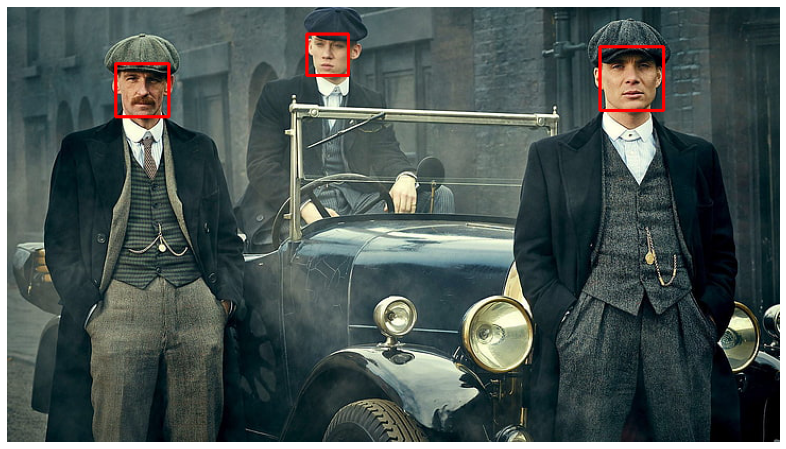

In [8]:
import numpy as np
import cv2


def generate_bounding_box(image_url, boundRect):
    image = Image.open(BytesIO(requests.get(image_url).content))
    np_img = np.asarray(image)
    drawing = np_img
    for i in range(len(boundRect)):
        color = (255,0,0)
        cv2.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
          (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)


    #showing image
    plt.figure(figsize=(14,8))
    plt.imshow(drawing)
    plt.axis("off")
    plt.show()
generate_bounding_box(image_url,faces)